In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# DERİVATİVE

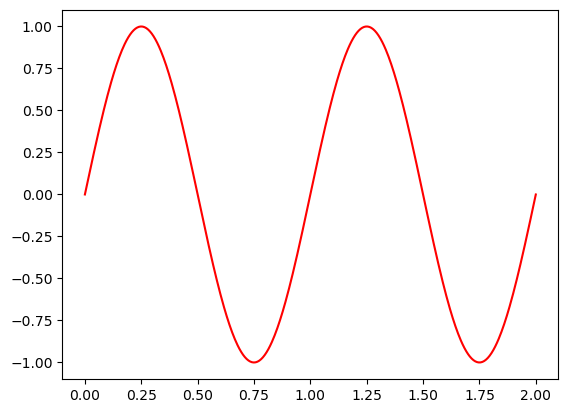

In [9]:
N=500
x=np.linspace(0,2,N)
dx=x[1]-x[0]
y=np.sin(2*np.pi*x)
plt.plot(x,y,"red")

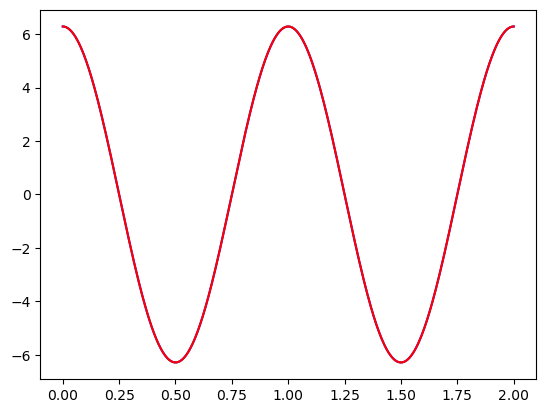

In [10]:
y_derivative=np.gradient(y,dx)
plt.plot(x,y_derivative,"blue")
plt.plot(x,2*np.pi*np.cos(2*np.pi*x),"red")#ikiside aynı grafik.

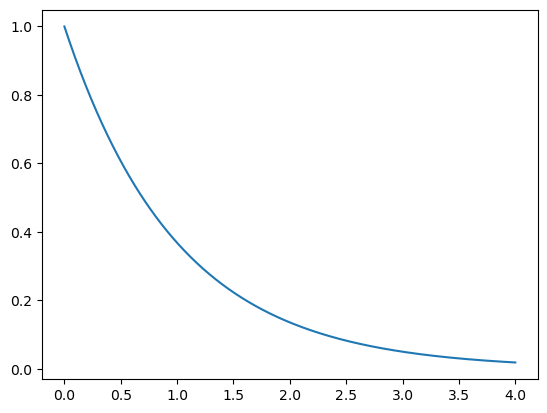

In [11]:
N=1000
x=np.linspace(0,4,N)
dx=x[1]-x[0]
y=np.exp(-x)
plt.plot(x,y);#noktalı virgul koyunca sonuna üstte cıkan yazı kayboluyor.

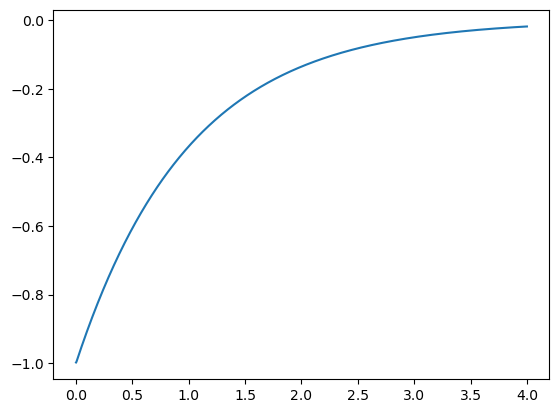

In [12]:
y_der=np.gradient(y,dx)
plt.plot(x,y_der)

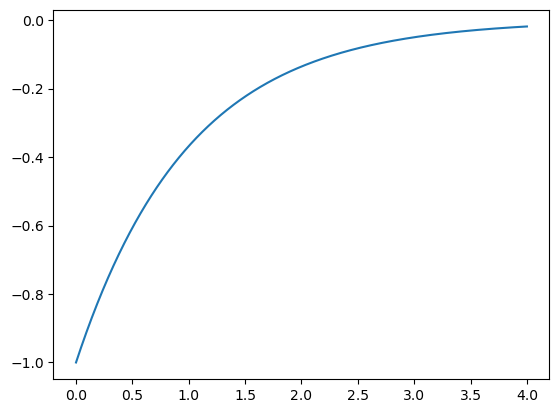

In [13]:
a=-np.exp(-x)
plt.plot(x,a)

# INTEGRATION
$$ \int_a^b f(x) dx $$

In [14]:
import scipy as sc

In [15]:
def func(x):
    return np.exp(-x)

In [16]:
int_y=sc.integrate.quad(func,0,100)#burda verdiğin değer fonksıyon olmalı dikkat et.
print(int_y)#sag kısmı hata payı sol kısmı ıntegralın sonucunu verdı.

(1.0000000000000002, 5.98946426851911e-12)


In [17]:
N=1000#integralın alınması.sonsuz kere bölündüğü için N arttıkca deger verılen deger daha dogru oluyor.
x=np.linspace(0,10,N)#sonsuz dıktorgenlere boldugun ıcın dx en funcx ise boy.carpımı dıkdortgen alanı verıyor.
dx=x[1]-x[0]
y=np.sum(func(x))*dx
print(y)

1.004968181934117


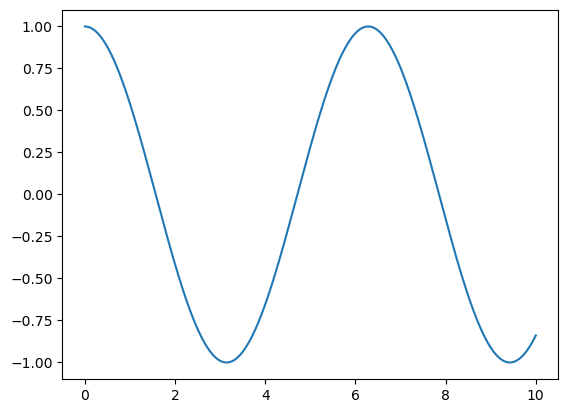

In [18]:
N=500
x=np.linspace(0,10,N)
int_y=np.zeros(N)
plt.plot(x,np.cos(x));

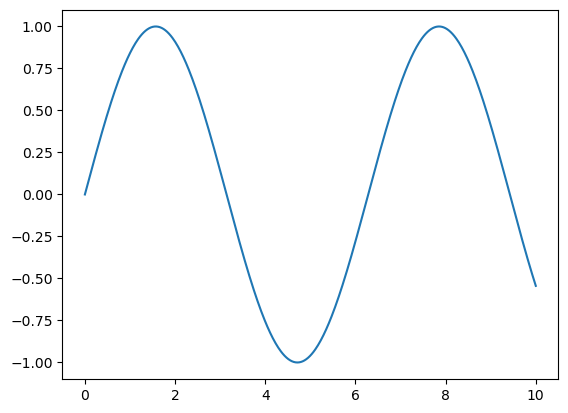

In [19]:
for ind,x_val in enumerate(x):
    int_y[ind]=sc.integrate.quad(lambda x:np.cos(x),0,x_val)[0]#0ı almamızın nedeni quad fonkunda 0.indeks integralın degerını verıyor.
plt.plot(x,int_y);#nümerik herhangı bır x baglı ıntegral alma.

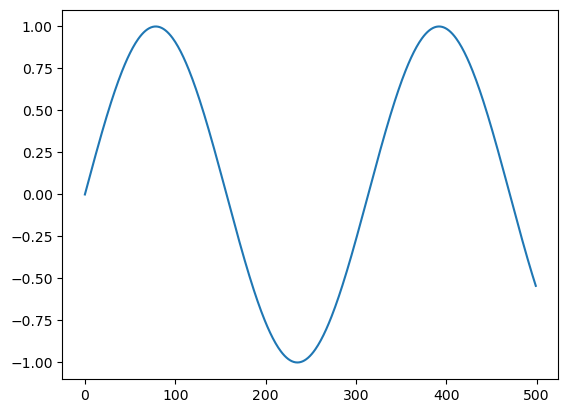

In [20]:
plt.plot(np.sin(x))#cosx in integrali sinx oldugu ıcın grafıklerı aynı oldu.

# SCİPY

In [21]:
import scipy as sc
sc.special.jv
sc.stats.norm

In [22]:
sc.special.jv(1,5)#bessel fonksiyonu.

-0.3275791375914651

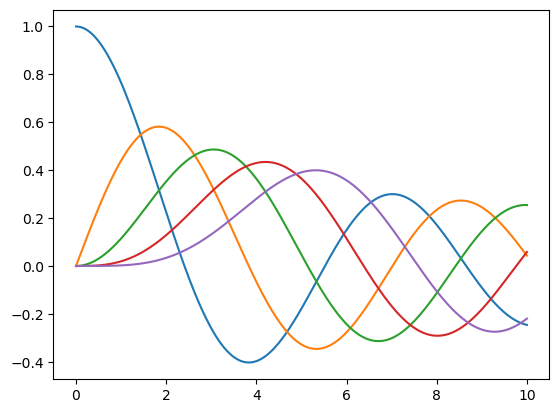

In [23]:
N=500
z=np.linspace(0,10,N)
for v in range(5):
    plt.plot(z,sc.special.jv(v,z))#0 dan 5 e kadar gıden butun bessel fonkıyonlkarını cızdırdık.

In [24]:
import scipy.stats #istatistik için gereken scipy kutuphanesı.

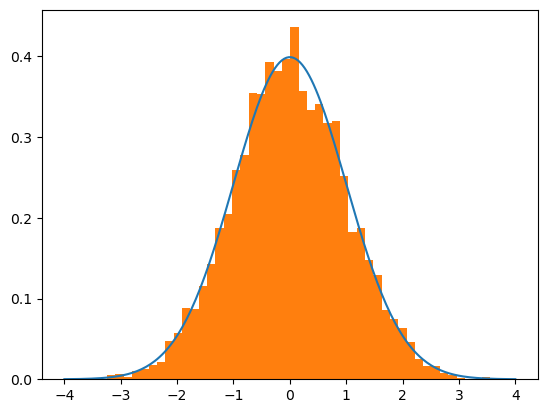

In [25]:
x=np.linspace(-4,4,200)
plt.plot(x,scipy.stats.norm.pdf(x));#norm.pdf dedıgımız kısım olasılıgın yogunluk dagılımı fonklsıyonu siteden bakabılırsın.
plt.hist(scipy.stats.norm.rvs(size=5000),density=True,bins=50);#plt.hist dedıgınde hıstogramını cızersın.
#histogram da sen sureklı çalıstırdıgında degıscek.Çunku olasılıksal olarak dagıtıyo noktaları.
#bins diktorgenın bolmelerını ayarlıyor.Size da nokta sayılarını belirtiyor.

In [31]:
M=np.array([[-1,2,6],[5,4,1],[8,9,11]])
M

array([[-1,  2,  6],
       [ 5,  4,  1],
       [ 8,  9, 11]])

In [32]:
scipy.linalg.det(M)

-50.999999999999986

In [33]:
scipy.linalg.eig(M)

(array([16.15660396+0.j, -3.15660396+0.j,  1.        +0.j]),
 array([[ 0.34468877,  0.821949  ,  0.40824829],
        [ 0.2168993 , -0.5590147 , -0.81649658],
        [ 0.91331503, -0.10909818,  0.40824829]]))

# OPTİMİZATİON

In [34]:
from scipy.optimize import curve_fit

In [35]:
def profile(f,f0,gamma,offset):
    return 1 / (1 + ((f-f0) / gamma)**2) + offset
#frekansa bağlı bir eğriyi göstericek.Bu eğrinin merkezi f0, genişliği gamma, 0 dan yukseklıgı ise offset

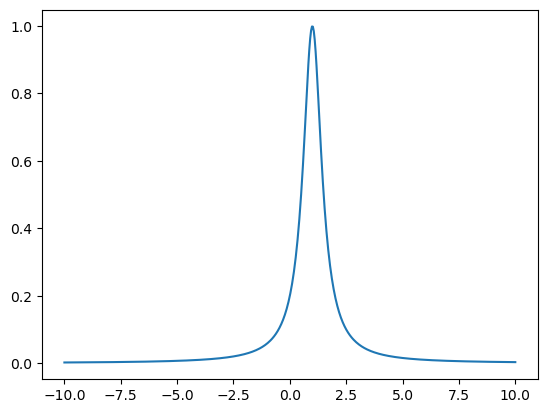

In [37]:
N=500
f=np.linspace(-10,10,N)
y=profile(f,1,0.5,0)
plt.plot(f,y);

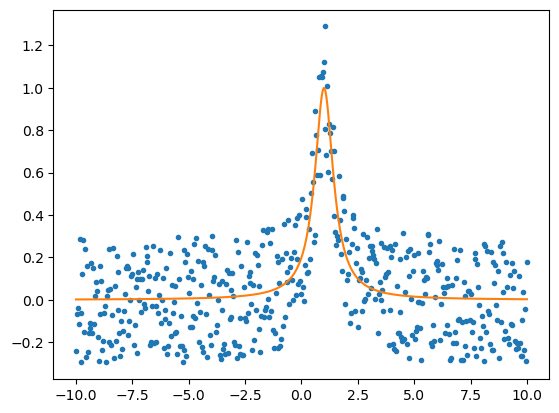

In [39]:
y_data=y + np.random.uniform(-0.3,0.3,N)
plt.plot(f,y_data,".")
plt.plot(f,y)

[ 0.99268833  0.52194119 -0.01827064]


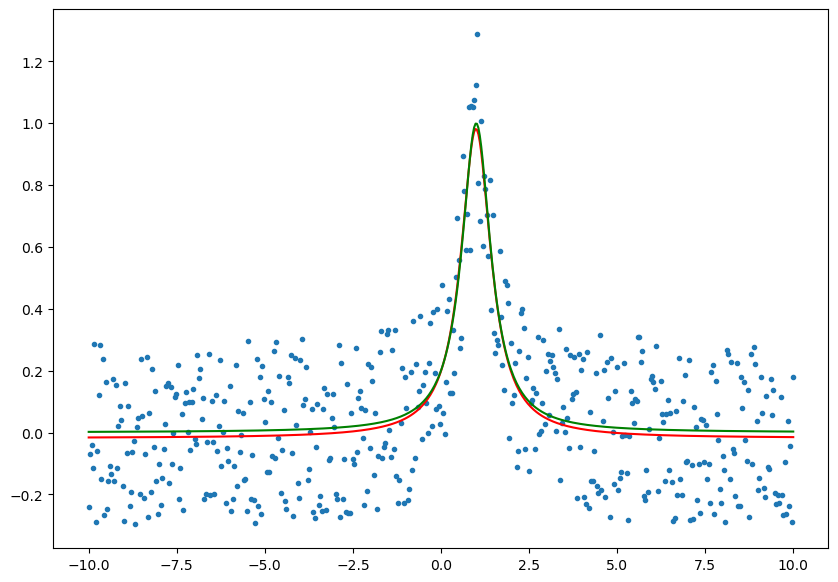

In [45]:
popt,pcov= curve_fit(profile,f,y_data,p0=[0.5,1,-0.1])
print(popt)#Turuncu egrinin parametrelerine ulasmak için curve_fit i kullandık.
#f ve y_datayı profile arasında karsılastırıyo ve bunu en ıyı acıklayan degelerı veriyor.Optimizasyon işlemini hızlandırmak 
#için sonda değer tahminleri yaptık.Mükemmele yaklaştırmak için optimizasyon yaptık.
plt.figure(figsize=(10,7))
plt.plot(f,y_data,".")
plt.plot(f,profile(f,*popt),"Red")#Curve fiting sonucu
plt.plot(f,profile(f,1,0.5,0),"Green")#En ideal sonuc

# ODEİNT(HARMONİC OSCİLLATOR)

In [2]:
from scipy.integrate import odeint

$$\frac{d}{dt}[\dot{x},x]=[...,\dot{x}]$$

In [12]:
def model(u,t,omega_0,beta,omega,amplitude):
    xdot,x=u
    return [-(omega_0**2)*x-beta*xdot+amplitude*(omega_0**2)*np.sin(omega*t),xdot]
#türevini aldıgımız vektore u dedik,t zaman,omega0 dogal frekans,beta sürtünme
#omega uyguladımız kuvvetin salınım frekansı,amplitude uyguladıgımız kuvvetin büyüklüğü.

In [13]:
N=500
t=np.linspace(0,100,N)
y0=[0,1]#inital conditions[v(0),x(0)]

In [14]:
beta=0
omega=0
amplitude=0
omega0=1
sol=odeint(model,y0,t,args=(omega0,beta,omega,amplitude))

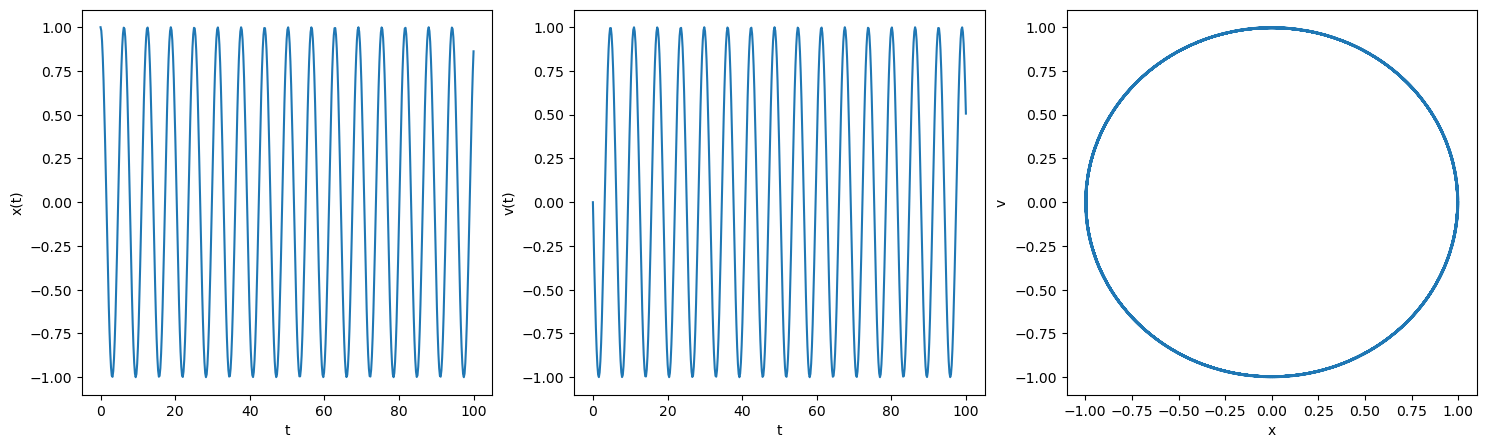

In [15]:
plt.figure(figsize=(18,5))
ax1=plt.subplot(1,3,1)
plt.plot(t,sol[:,1])
plt.xlabel("t")
plt.ylabel("x(t)")
ax2=plt.subplot(1,3,2)
plt.plot(t,sol[:,0])
plt.xlabel("t")
plt.ylabel("v(t)")
ax3=plt.subplot(1,3,3)
plt.plot(sol[:,1],sol[:,0])
plt.xlabel("x")
plt.ylabel("v");
#sürtünmesiz ortam.